In [1]:
#Isolation Forest And PPS

In [2]:
#Importing Necessary Libraries
import pandas as pd
from sklearn.ensemble import IsolationForest

In [3]:
#Dummy Dataset
df = pd.DataFrame({
    'Marks':[82,87,85,86,84,900],
    'Time':[1,1.2,1.5,2,1.8,5]
})

In [4]:
df

,Marks,Time
0,82,1.0
1,87,1.2
2,85,1.5
3,86,2.0
4,84,1.8
5,900,5.0


In [5]:
iso = IsolationForest()
iso.fit(df)

IsolationForest()

In [6]:
iso.predict(df)

array([ 1,  1,  1,  1,  1, -1])

In [7]:
out = iso.predict(df)

In [8]:
df['Outlier'] = out
df

,Marks,Time,Outlier
0,82,1.0,1
1,87,1.2,1
2,85,1.5,1
3,86,2.0,1
4,84,1.8,1
5,900,5.0,-1


In [9]:
df['Outlier'].value_counts()

 1    5
-1    1
Name: Outlier, dtype: int64

In [10]:
len(df[df['Outlier']==-1])

1

In [11]:
#Read Dataset

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Isolation_data.csv')
df

,Frozen,Delicassen
0,214,1338
1,1762,1776
2,2405,7844
3,6404,1788
4,3915,5185
...,...,...
435,13135,2204
436,4510,2346
437,437,1867
438,1038,2125


<Axes: >

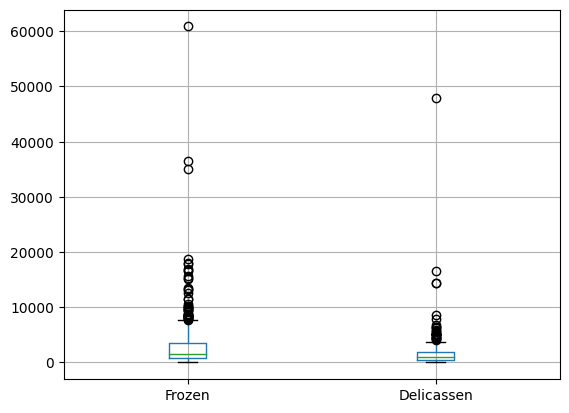

In [13]:
df.boxplot()

In [14]:
iso = IsolationForest()
iso.fit(df)
outliers = iso.predict(df)

In [15]:
df['outliers'] = outliers

In [16]:
df

,Frozen,Delicassen,outliers
0,214,1338,1
1,1762,1776,1
2,2405,7844,-1
3,6404,1788,1
4,3915,5185,-1
...,...,...,...
435,13135,2204,-1
436,4510,2346,1
437,437,1867,1
438,1038,2125,1


In [17]:
import plotly.express as pe

In [18]:
pe.box(data_frame=df,x='Frozen')

In [19]:
pe.box(data_frame=df,x='Delicassen')

In [20]:
#PPS

In [21]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=ade2c9dceb4fb112cef6577133ffbe544fa374c633bda08b2a374faf97ed7a53
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [22]:
import ppscore as ps

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Iris.csv', index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [24]:
ps.score(df,'SepalLengthCm','Species')

{'x': 'SepalLengthCm',
 'y': 'Species',
 'ppscore': 0.47164941668027915,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.35333333333333333,
 'model_score': 0.6583332894532472,
 'model': DecisionTreeClassifier()}